<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/stat_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.stats as scs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Numbers

In [ ]:
x = scs.norm.rvs(loc=109, scale=2, size = 5000)
y = scs.t.rvs(loc = 105,scale = 3,df = 50,size = 5000)
df = pd.DataFrame(data = x, columns = ['x'])
df['y'] = y

print('variance:',x.var())
print('std: ',x.std())
print('unbiased variance:', x.var(ddof=1))
print('unbiased std: ',x.std(ddof=1))

variance: 4.037197486092916
std:  2.009277851889309
unbiased variance: 4.038005087110338
unbiased std:  2.0094788098186895


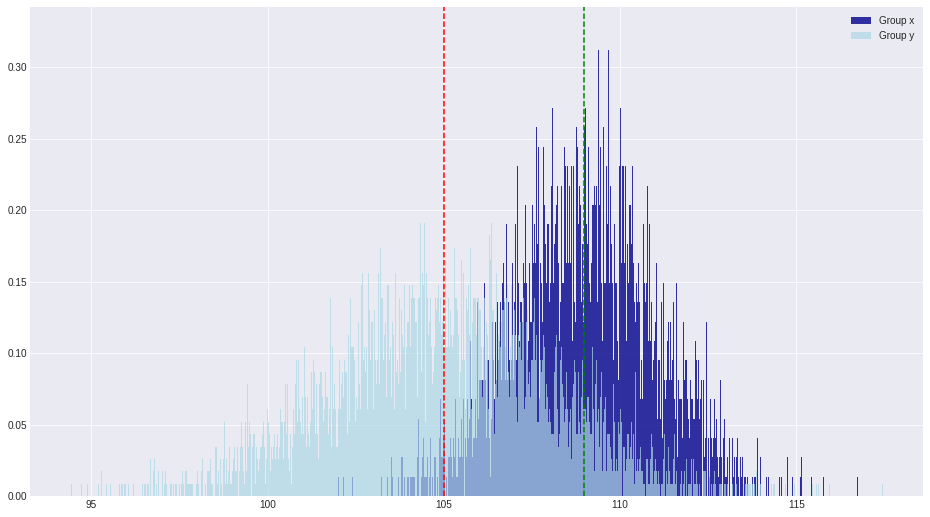

In [ ]:
plt.style.use('seaborn-darkgrid')
fix, ax = plt.subplots(figsize = (16,9))
ax.axvline(x = df.x.mean(),color = 'green',linestyle = '--')
ax.hist(x = df.x, bins = 1000, density = True, color = 'darkblue',label = 'Group x',alpha = 0.8)
ax.axvline(x = df.y.mean(),color = 'red',linestyle = '--')
ax.hist(x = df.y, density = True, bins = 1000, color = 'lightblue',label = 'Group y',alpha = 0.7)
plt.legend()

In [ ]:
print(scs.norm.ppf(0.25, loc=109, scale=2))
print(scs.norm.cdf(105, loc=109, scale=2))

107.65102049960784
0.022750131948179195


## Monte Carlo Simulation

Text(0, 0.5, 's/n')

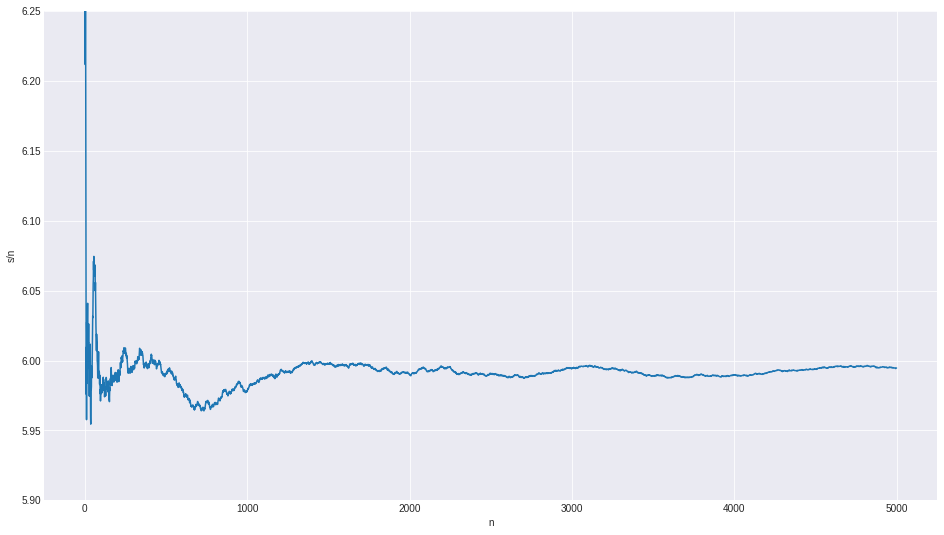

In [ ]:
df['beta'] = scs.beta.rvs(2,2,loc = 5, scale = 2,size = 5000)
df['beta'] = df.beta.cumsum() # cumulative sum
df['beta'] = df.apply(lambda x: df['beta']/(1+df.index)) # mean value (s/n)

plt.figure(figsize = (16,9))
plt.plot(df['beta'])
plt.ylim(5.9,6.25)
plt.xlabel('n')
plt.ylabel('s/n')

Text(0, 0.5, 's/n')

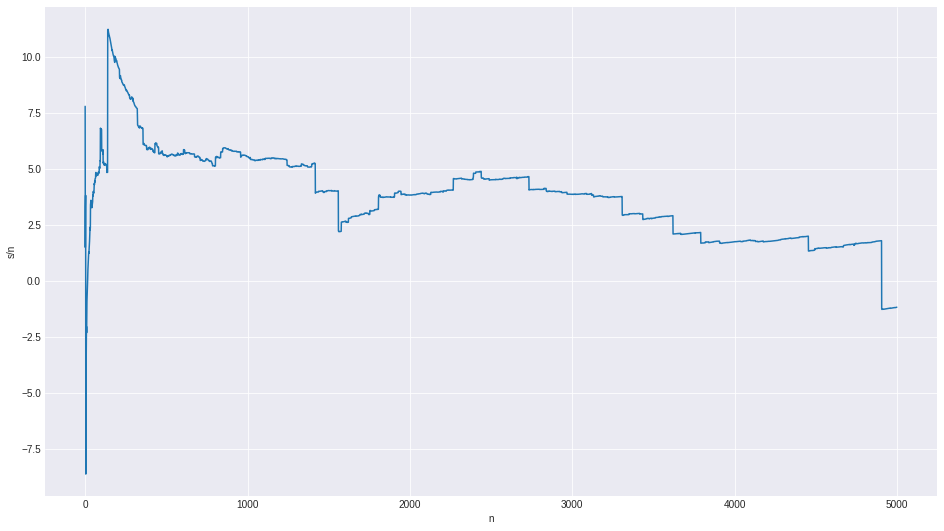

In [ ]:
df['cauchy'] = scs.cauchy.rvs(loc = 5,scale = 2,size = 5000)
df['cauchy'] = df.cauchy.cumsum() # cumulative sum
df['cauchy'] = df.apply(lambda x: df['cauchy']/(1+df.index)) # mean value (s/n)

plt.figure(figsize = (16,9))
plt.plot(df['cauchy'])
plt.xlabel('n')
plt.ylabel('s/n')

## Monte Carlo Integration

Text(0, 0.5, 'G(x)/n')

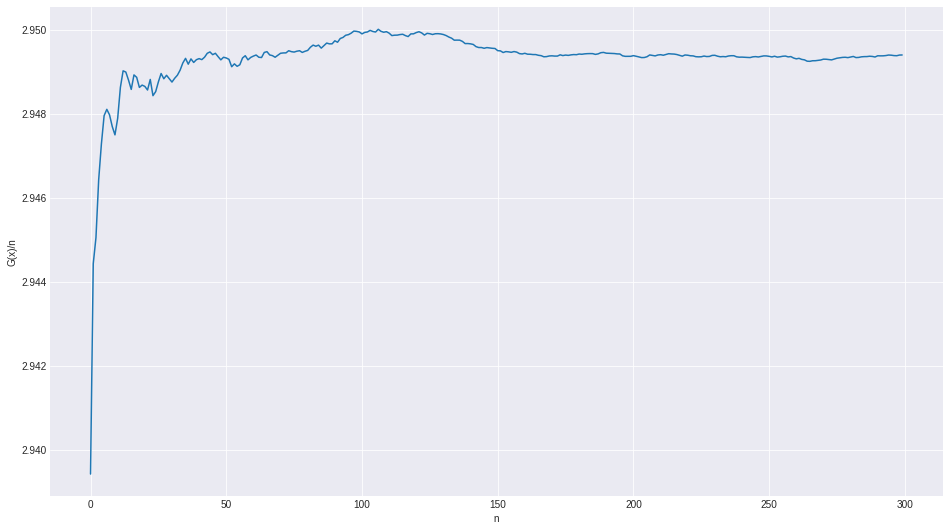

In [ ]:
# g(x) = sqrt(1 + cos(x)^3)
gx = []
for i in range(300):
  x = scs.uniform.rvs(loc = 0, scale = np.pi,size = 10000)
  g = np.sqrt(1+(np.cos(x))**3)
  gx.append(np.pi*(g.mean()))

gx = pd.DataFrame(data = gx, columns = ['g'])
gx['G'] = gx['g'].cumsum()
gx['G'] = gx.apply(lambda x: gx['G']/(gx.index+1))

plt.figure(figsize = (16,9))
plt.plot(gx['G'])
plt.xlabel('n')
plt.ylabel('G(x)/n')

In [ ]:
gx.g.describe()

count    300.000000
mean       2.949395
std        0.003577
min        2.939422
25%        2.946890
50%        2.949379
75%        2.951829
max        2.958363
Name: g, dtype: float64

## Central Limit Theorem

In [ ]:
def Z_score(Sn,u,var,n):
  return (Sn-u)/(var/np.sqrt(n))

In [ ]:
scs.norm.pdf(Z_score(2,0,4,9),loc = 0, scale = 1)

0.12951759566589174

In [ ]:
def Z_score2(Sn,p,n):
  return (Sn-n*p)/(np.sqrt(n*p*(1-p)))

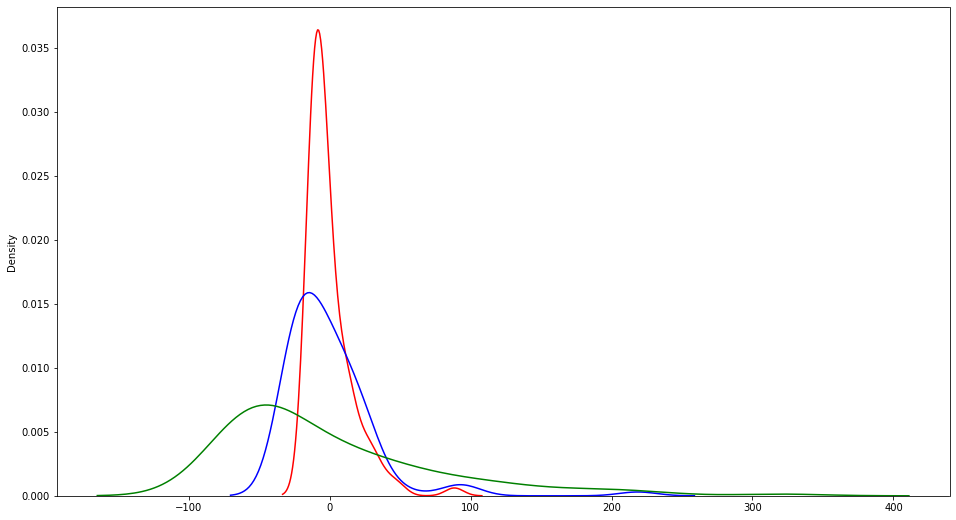

In [ ]:
x = scs.expon.rvs(scale = 1/2,size = 100)
y = scs.expon.rvs(scale = 1/4,size = 100)
z = scs.expon.rvs(scale = 1/8,size = 100)
x = (x-x.mean())/(x.var()/np.sqrt(len(x)))
y = (y-y.mean())/(y.var()/np.sqrt(len(y)))
z = (z-z.mean())/(z.var()/np.sqrt(len(z)))


plt.figure(figsize = (16,9))
fig = sns.kdeplot(x, color = 'r')
fig = sns.kdeplot(y, color = 'b')
fig = sns.kdeplot(z, color = 'g')
plt.show()

In [ ]:
scs.norm.ppf(0.975)

1.959963984540054

## Binomial Test

In [ ]:
# For a test of hive survivability over a harsh winter, 
# we have H0 :p≥0.7 versus H1 :p<0.7.
# If we have 26 observations, use the central limit theorem directly to the binomial distribution. 
# If 16 hives survive, then we use the binomial test.
scs.binom_test(16,26,0.7, alternative='less')

0.2295267789226019

In [ ]:
p = 16/26
z = (p-0.7)/(np.sqrt(0.7*(1-0.7)/26))
pvalue = scs.norm.pdf(z)
print(z,pvalue)

-0.9415130835240075 0.2561064818061865


## Likelihood Test

In [ ]:
# H0 :p1 =p2 versus H1 :p1 != p2
a = [64,88]; b = [99,112]
p1 = a[0]/a[1] ; p2 = b[0]/b[1]
p0 = (88*p1+112*p2)/(88+112)
z = (p1-p2)/(np.sqrt(p0*(1-p0)*((1/88)+(1/112))))
pvalue = scs.norm.pdf(z)*2 # two sided
print(z,pvalue)

-2.83215672272798 0.014460316078234186


## T-test

In [1]:
pip install pingouin

     |████████████████████████████████| 205 kB 5.2 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204754 sha256=9bbc73497d521527aa46218930220ebcbdd75435334bd0872df67954afb52e31
  Stored in directory: /root/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=0092a0584288d8e59d41f9998fd624554876d73dff41b2e3168b1be917814398
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [3]:
# H0: x = y
import pingouin as pg
x = [1, 2, 3, 4, 5]
y = [0, 1, 2, 3, 6]
model = pg.ttest(x, y,tail = 'two-sided')
print(model)

               T  dof       tail  ...   cohen-d   BF10     power
T-test  0.480384    8  two-sided  ...  0.303822  0.529  0.070989

[1 rows x 8 columns]


## ANOVA

In [4]:
dt = pg.read_dataset('anova3')
pg.anova(dv="Cholesterol", between=["Sex", "Drug"], data=dt)

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,2.074568,1,2.074568,1.994228,0.163637,0.035615
1,Drug,0.815743,2,0.407872,0.392076,0.677560,0.014313
2,Sex * Drug,2.564162,2,1.282081,1.232431,0.299653,0.043653
3,Residual,56.175467,54,1.040286,NaN,NaN,NaN


## Thompson Sampling

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/Ads_CTR_Optimisation.csv')
import random

N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
numbers_of_rewards_1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
ad = 0
max_random = 0
for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i

In [ ]:
ad

8

In [ ]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

In [ ]:
for i in range(0,10):
  x = ads_selected.count(i)
  print(i+1,x)

1 88
2 45
3 69
4 127
5 8992
6 31
7 63
8 464
9 85
10 36


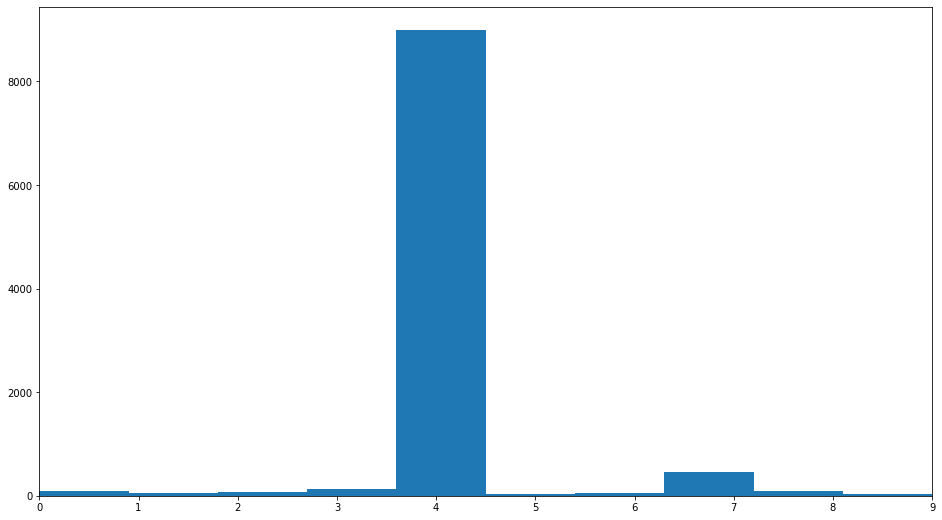

In [ ]:
plt.figure(figsize = (16,9))
plt.hist(ads_selected)
plt.xlim(0,9)
plt.show()

## Upper Confidence

In [ ]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

In [ ]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [ ]:
for i in range(0,10):
  x = ads_selected.count(i)
  print(i+1,x)

1 579
2 388
3 240
4 337
5 6020
6 152
7 300
8 1483
9 304
10 198


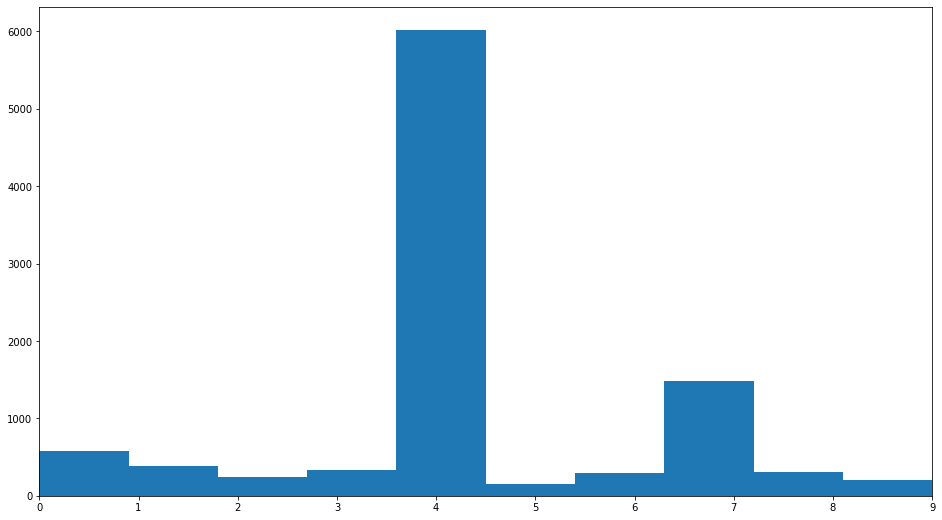

In [ ]:
plt.figure(figsize = (16,9))
plt.hist(ads_selected)
plt.xlim(0,9)
plt.show()